In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import matplotlib.backends.backend_pdf

In [3]:
%matplotlib inline

In [4]:
fs = (5, 4)

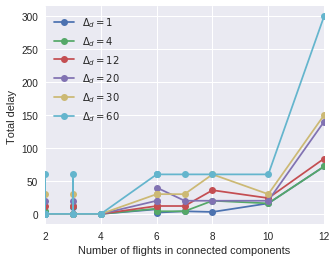

In [5]:
data = pd.read_csv('../data/icm_2.txt', sep='\t', header=range(7))
data = data.reset_index()
data.columns = ['nf', '$\Delta_d=1$', '$\Delta_d=4$', '$\Delta_d=12$', '$\Delta_d=20$', '$\Delta_d=30$', '$\Delta_d=60$']
data.set_index('nf', inplace=True)

fig = plt.figure(figsize=fs)
ax = fig.add_subplot(1, 1, 1)
data.plot(ax=ax, style='o-')

ax.set_xlabel('Number of flights in connected components')
ax.set_ylabel('Total delay ');

pdf = matplotlib.backends.backend_pdf.PdfPages('../qubo_icm_2.pdf');
pdf.savefig(figure=fig);
pdf.close();

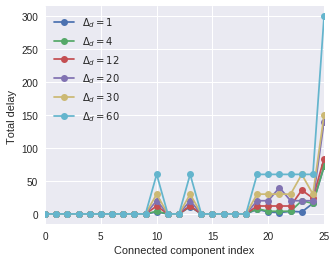

In [6]:
data = pd.read_csv('../data/icm_3.txt', sep='\t', header=range(7))
data = data.reset_index()
data.columns = ['nf', '$\Delta_d=1$', '$\Delta_d=4$', '$\Delta_d=12$', '$\Delta_d=20$', '$\Delta_d=30$', '$\Delta_d=60$']
data.set_index('nf', inplace=True)

fig = plt.figure(figsize=fs)
ax = fig.add_subplot(1, 1, 1)
data.plot(ax=ax, style='o-')

ax.set_xlabel('Connected component index')
ax.set_ylabel('Total delay ');

pdf = matplotlib.backends.backend_pdf.PdfPages('../qubo_icm_3.pdf');
pdf.savefig(figure=fig);
pdf.close();

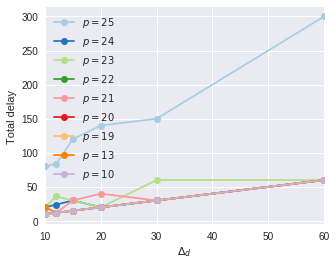

In [7]:
data = pd.read_csv('../data/icm_4.txt', sep='\t', header=range(10))
data = data.reset_index()
data.columns = ['deltad', '$p=25$', '$p=24$', '$p=23$', '$p=22$', '$p=21$', '$p=20$', '$p=19$', '$p=13$', '$p=10$']
data.set_index('deltad', inplace=True)
seaborn.set_palette("Paired", n_colors=9)

fig = plt.figure(figsize=fs)
ax = fig.add_subplot(1, 1, 1)
data.plot(ax=ax, style='o-')
ax.set_xlabel('$\Delta_d$')
ax.set_ylabel('Total delay ');
pdf = matplotlib.backends.backend_pdf.PdfPages('../qubo_icm_4.pdf');
pdf.savefig(figure=fig);
pdf.close();

In [86]:
s = []
for c in list(data.columns):
    a = data.groupby(c).count()
    a = a[a.columns[0]]
    a.name = c
    s.append(a)

In [104]:
histdata = pd.concat(s, axis=1).fillna(0)
#histdata.columns = ['$\Delta_d=1$', '$\Delta_d=4$', '$\Delta_d=12$', '$\Delta_d=20$', '$\Delta_d=30$', '$\Delta_d=60$']


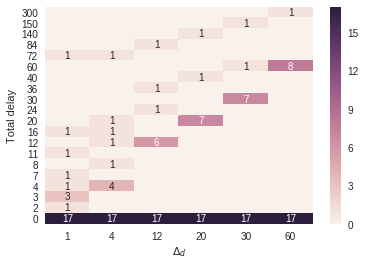

In [107]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
annotation = histdata.applymap(lambda x: '' if x == 0.0 else '%i' % x).values

seaborn.heatmap(histdata, annot=annotation, fmt = '', ax=ax);
ax.invert_yaxis()#
ax.set_xlabel('$\Delta_d$')
ax.set_ylabel('Total delay')

pdf = matplotlib.backends.backend_pdf.PdfPages('../qubo_icm_3.pdf');
pdf.savefig(figure=fig);
pdf.close();

In [108]:
histdata.to_csv('icm_3_histogram_data.csv')